In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 

import matplotlib.pyplot as plt
%matplotlib inline

Data Preprocessing

In [ ]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values

In [ ]:
# Separating Dataset into Features and Target Variables
# X: (First 12 Columns)
# y: (Column 13)
# a-g and j

X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]




In [ ]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)


In [ ]:
#Using a linear kernel 
from sklearn import svm
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

acc_train_svm_linear = []
acc_test_svm_linear = []

#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

print()

#test
print("Test Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)
    yhat_svc_linear_test = svc_linear.predict(x_test)
    acc_test_linear = np.mean(yhat_svc_linear_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test_linear)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_linear)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_linear_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
    #print('Test Accuracy = {0:f}'.format(acc_test_linear))
    



Train Accuracy using a Linear kernel
Train Accuracy(c=0.0001): 0.8245141427746777
Train Accuracy(c=0.001): 0.9778718491437368
Train Accuracy(c=0.01): 0.9809505483933039
Train Accuracy(c=0.1): 0.9821050606118915
Train Accuracy(c=1): 0.9828747354242833
Train Accuracy(c=10): 0.9828747354242833
Train Accuracy(c=100): 0.9828747354242833

Test Accuracy using a Linear kernel
Test Accuracy(c=0.0001): 0.8253846153846154
Precision: 0.8117744610281924 
Recall: 1.0 
Fscore: 0.8961098398169337
Test Accuracy(c=0.001): 0.9838461538461538
Precision: 0.9828629032258065 
Recall: 0.9959141981613892 
Fscore: 0.9893455098934552
Test Accuracy(c=0.01): 0.9876923076923076
Precision: 0.9908256880733946 
Recall: 0.992849846782431 
Fscore: 0.9918367346938775
Test Accuracy(c=0.1): 0.9869230769230769
Precision: 0.9898167006109979 
Recall: 0.992849846782431 
Fscore: 0.9913309535951046
Test Accuracy(c=1): 0.9869230769230769
Precision: 0.9898167006109979 
Recall: 0.992849846782431 
Fscore: 0.9913309535951046
Test Acc

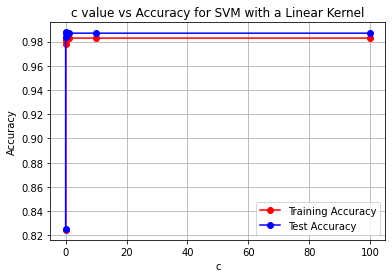

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_linear, 'ro-')
plt.plot(cVals, acc_test_svm_linear, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("c value vs Accuracy for SVM with a Linear Kernel")
# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
#Using a rbf kernel 
acc_train_svm_rbf = []
acc_test_svm_rbf = []

#train
print("Train Accuracy using a RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)

    yhat_svc_rbf_train = svc_rbf.predict(x_train)
    acc_train_rbf = np.mean(yhat_svc_rbf_train == y_train)
    acc_train_svm_rbf.append(acc_train_rbf)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_rbf)

print()

#test
print("Test Accuracy using a RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)
    yhat_svc_rbf_test = svc_rbf.predict(x_test)
    acc_test_rbf = np.mean(yhat_svc_rbf_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test_rbf)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_rbf)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_rbf_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)

Train Accuracy using a RBF kernel
Train Accuracy(c=0.0001): 0.7540888974408313
Train Accuracy(c=0.001): 0.7540888974408313
Train Accuracy(c=0.01): 0.9767173369251492
Train Accuracy(c=0.1): 0.9888397152203194
Train Accuracy(c=1): 0.9924956705791803
Train Accuracy(c=10): 0.9959592072349432
Train Accuracy(c=100): 0.9984606503752165

Test Accuracy using a RBF kernel
Test Accuracy(c=0.0001): 0.7530769230769231
Precision: 0.7530769230769231 
Recall: 1.0 
Fscore: 0.8591487494515139
Test Accuracy(c=0.001): 0.7530769230769231
Precision: 0.7530769230769231 
Recall: 1.0 
Fscore: 0.8591487494515139
Test Accuracy(c=0.01): 0.9792307692307692
Precision: 0.9750499001996008 
Recall: 0.9979570990806946 
Fscore: 0.9863705199394246
Test Accuracy(c=0.1): 0.9915384615384616
Precision: 0.9908722109533469 
Recall: 0.9979570990806946 
Fscore: 0.9944020356234097
Test Accuracy(c=1): 0.9953846153846154
Precision: 0.9949135300101729 
Recall: 0.9989785495403473 
Fscore: 0.9969418960244648
Test Accuracy(c=10): 0.993

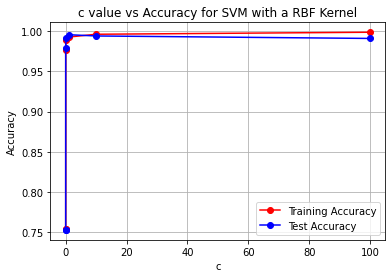

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_rbf, 'ro-')
plt.plot(cVals, acc_test_svm_rbf, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("c value vs Accuracy for SVM with a RBF Kernel")

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
#Using a Polynomial kernel 
acc_train_svm_poly = []
acc_test_svm_poly = []

#train
print("Train Accuracy using a poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)

    yhat_svc_poly_train = svc_poly.predict(x_train)
    acc_train_poly = np.mean(yhat_svc_poly_train == y_train)
    acc_train_svm_poly.append(acc_train_poly)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_poly)

print()

#test
print("Test Accuracy using a poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)
    yhat_svc_poly_test = svc_poly.predict(x_test)
    acc_test_poly = np.mean(yhat_svc_poly_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test_poly)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_poly)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_poly_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)

Train Accuracy using a poly kernel
Train Accuracy(c=0.0001): 0.7608235520492592
Train Accuracy(c=0.001): 0.8526072734269771
Train Accuracy(c=0.01): 0.9401577833365403
Train Accuracy(c=0.1): 0.9707523571291129
Train Accuracy(c=1): 0.98691552818934
Train Accuracy(c=10): 0.9915335770636906
Train Accuracy(c=100): 0.9955743698287474

Test Accuracy using a poly kernel
Test Accuracy(c=0.0001): 0.7592307692307693
Precision: 0.7577399380804953 
Recall: 1.0 
Fscore: 0.8621752531924262
Test Accuracy(c=0.001): 0.8530769230769231
Precision: 0.8373287671232876 
Recall: 0.9989785495403473 
Fscore: 0.911038658593386
Test Accuracy(c=0.01): 0.94
Precision: 0.9278252611585945 
Recall: 0.9979570990806946 
Fscore: 0.9616141732283465
Test Accuracy(c=0.1): 0.9707692307692307
Precision: 0.9644619940769991 
Recall: 0.9979570990806946 
Fscore: 0.9809236947791166
Test Accuracy(c=1): 0.9876923076923076
Precision: 0.9868554095045501 
Recall: 0.9969356486210419 
Fscore: 0.991869918699187
Test Accuracy(c=10): 0.9892

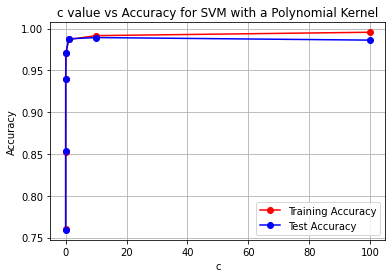

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_poly, 'ro-')
plt.plot(cVals, acc_test_svm_poly, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("c value vs Accuracy for SVM with a Polynomial Kernel")

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

![Picture title](image-20201126-163711.png)